In [4]:
import numpy as np            
import pandas as pd             
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost
from collections import Counter


In [5]:
data =pd.read_csv(r"C:\Users\alekhya\OneDrive\Desktop\smartbridge\trafficproject\traffic volume.csv")
data.head()

data.info()
data.describe() 
data.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,True,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
48199,True,False,False,False,False,False,False,False
48200,True,False,False,False,False,False,False,False
48201,True,False,False,False,False,False,False,False
48202,True,False,False,False,False,False,False,False


In [ ]:
# Add this dictionary mapping your old codes to actual holiday names
holiday_map = {
    0: "Christmas Day",
    1: "Columbus Day",
    2: "New Years Day",
    3: "State Fair",
    4: "Martin Luther King Jr Day",
    5: "Memorial Day",
    7: "None",  # or "No Holiday"
    8: "Labor Day",
    11: "Washingtons Birthday",
    12: "Independence Day",
    18: "Veterans Day",
    19: "Thanksgiving Day"
}

# Replace codes with names
data['is_holiday'] = data['is_holiday'].map(holiday_map)


In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')  # this prevents crash on unseen values
encoded_holiday = encoder.fit_transform(data[['is_holiday']])


In [6]:
from collections import Counter

# Fill missing numeric columns
data['temp'] = data['temp'].fillna(data['temp'].mean())
data['rain'] = data['rain'].fillna(data['rain'].mean())
data['snow'] = data['snow'].fillna(data['snow'].mean())

# Fill missing 'weather'
print(Counter(data['weather']))
data['weather'] = data['weather'].fillna('Clouds')

# Handle 'holiday' column safely
data['holiday'] = data['holiday'].fillna('None')
data['is_holiday'] = data['holiday'].apply(lambda x: 0 if x == 'None' else 1)


Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [7]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume,is_holiday
0,None,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545,0
1,None,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516,0
2,None,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767,0
3,None,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026,0
4,None,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918,0


<Axes: >

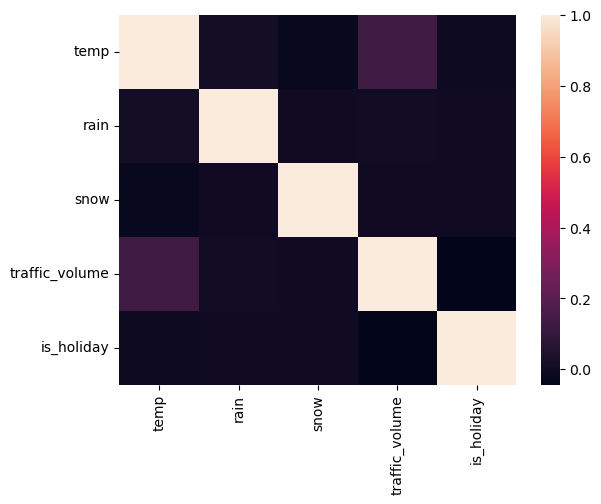

In [8]:
cor=data.corr(numeric_only=True)


data.corr(numeric_only=True)

sns.heatmap(cor)

In [9]:
data['is_holiday'] = data['holiday'].apply(lambda x: 0 if x == 'None' else 1)

data.head()
data[['traffic_volume', 'temp', 'rain', 'snow', 'is_holiday']].corr()

data['is_holiday'] = data['is_holiday'].astype(int)


In [10]:

corr_matrix = data[['traffic_volume', 'temp', 'rain', 'snow', 'is_holiday']].corr()
print(corr_matrix)

print(data['is_holiday'].dtype)

                traffic_volume      temp      rain      snow  is_holiday
traffic_volume        1.000000  0.130034  0.004714  0.000735   -0.042897
temp                  0.130034  1.000000  0.009070 -0.019758   -0.007712
rain                  0.004714  0.009070  1.000000 -0.000090   -0.000216
snow                  0.000735 -0.019758 -0.000090  1.000000   -0.000969
is_holiday           -0.042897 -0.007712 -0.000216 -0.000969    1.000000
int64


In [11]:
data['is_holiday'] = data['is_holiday'].apply(lambda x: 1 if x != 0 else 0).astype(int)

print(data['is_holiday'].dtype)

corr_matrix = data[['traffic_volume', 'temp', 'rain', 'snow', 'is_holiday']].corr()
print(corr_matrix)

print(data['is_holiday'].unique())
print(data['is_holiday'].isnull().sum())

int64
                traffic_volume      temp      rain      snow  is_holiday
traffic_volume        1.000000  0.130034  0.004714  0.000735   -0.042897
temp                  0.130034  1.000000  0.009070 -0.019758   -0.007712
rain                  0.004714  0.009070  1.000000 -0.000090   -0.000216
snow                  0.000735 -0.019758 -0.000090  1.000000   -0.000969
is_holiday           -0.042897 -0.007712 -0.000216 -0.000969    1.000000
[0 1]
0


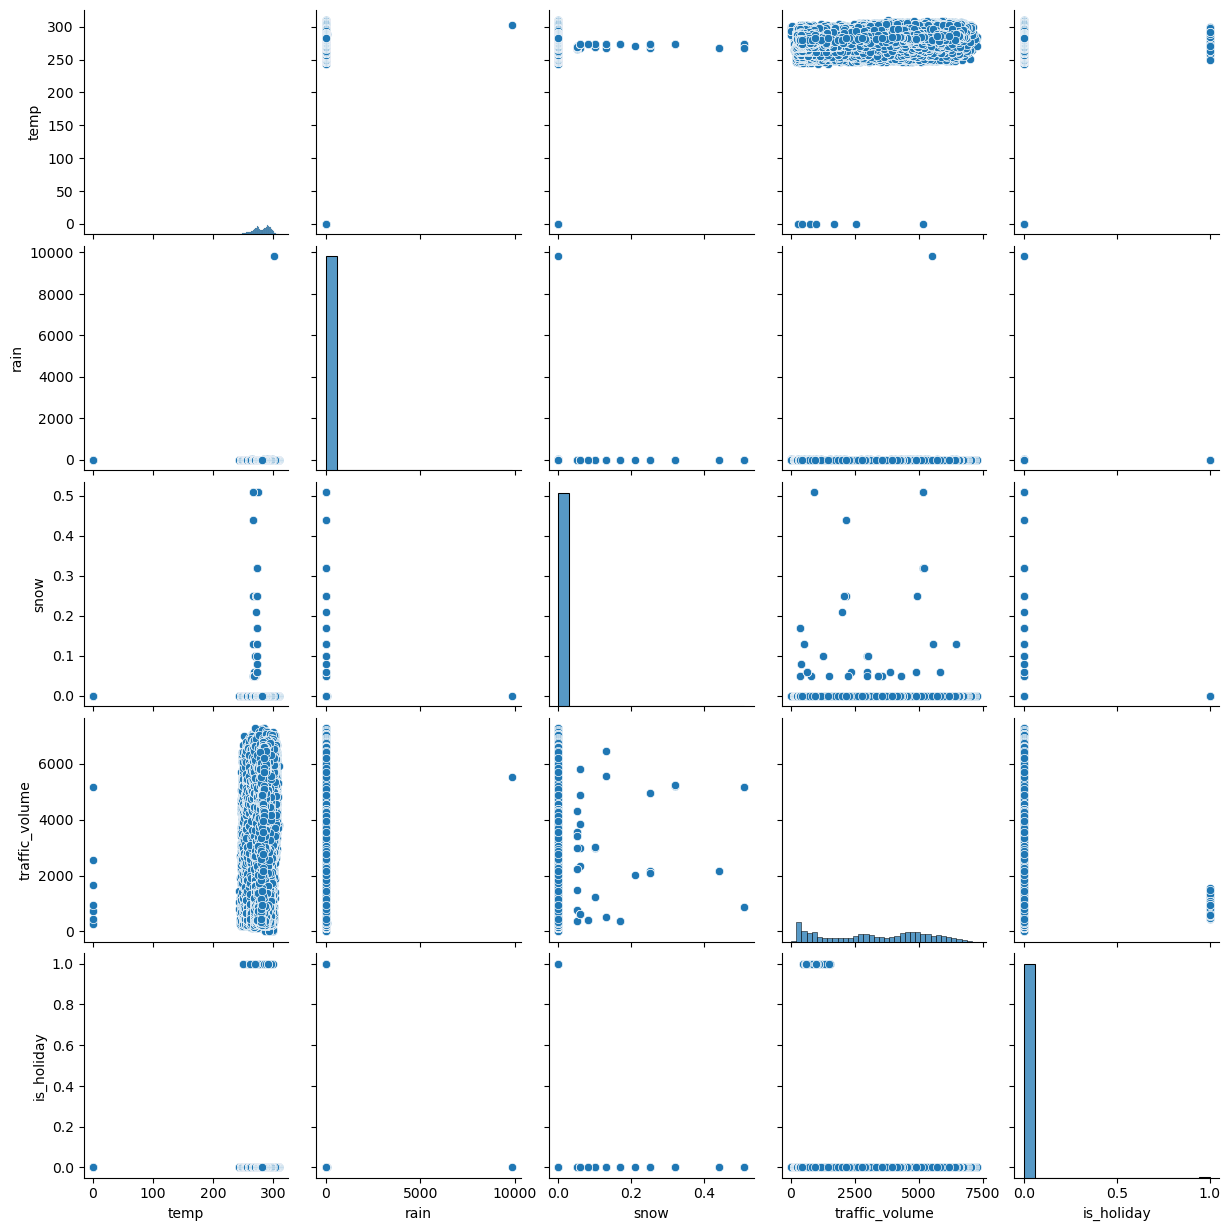

In [12]:
sns.pairplot(data)

<Axes: >

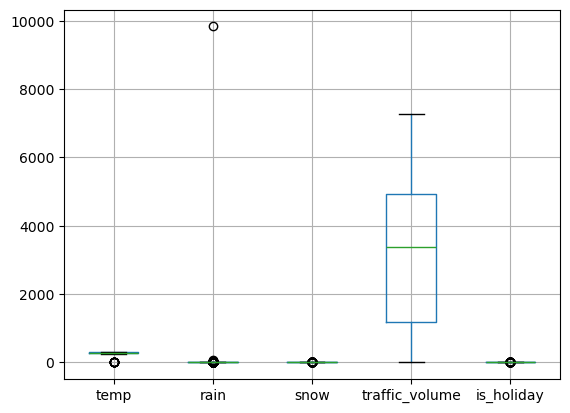

In [13]:
data.boxplot()

In [14]:
data[["day", "month", "year"]] = data["date"].str.split("-", expand=True)

data[["hours", "minutes", "seconds"]] = data["Time"].str.split(":", expand=True)

In [15]:
data.drop(columns=['date', 'Time'], axis=1, inplace=True)

data.head()

,holiday,temp,rain,snow,weather,traffic_volume,is_holiday,day,month,year,hours,minutes,seconds
0,None,288.28,0.0,0.0,Clouds,5545,0,02,10,2012,09,00,00
1,None,289.36,0.0,0.0,Clouds,4516,0,02,10,2012,10,00,00
2,None,289.58,0.0,0.0,Clouds,4767,0,02,10,2012,11,00,00
3,None,290.13,0.0,0.0,Clouds,5026,0,02,10,2012,12,00,00
4,None,291.14,0.0,0.0,Clouds,4918,0,02,10,2012,13,00,00


In [16]:
y = data['traffic_volume'] 
x = data.drop(columns=['traffic_volume'], axis=1)  
names=x.columns
from sklearn.preprocessing import scale
data['holiday'] = data['holiday'].apply(lambda x: 0 if x == 'None' else 1)

In [17]:
data = pd.get_dummies(data, columns=['holiday'], drop_first=True)

In [18]:
data.head()

print(data.columns)

print(data['is_holiday'].unique())



Index(['temp', 'rain', 'snow', 'weather', 'traffic_volume', 'is_holiday',
       'day', 'month', 'year', 'hours', 'minutes', 'seconds', 'holiday_1'],
      dtype='object')
[0 1]


In [19]:
data['is_holiday'] = data['is_holiday'].apply(lambda x: 0 if x == 'None' else 1)

In [20]:
print(data['is_holiday'].unique())

[1]


In [21]:
data.head()

,temp,rain,snow,weather,traffic_volume,is_holiday,day,month,year,hours,minutes,seconds,holiday_1
0,288.28,0.0,0.0,Clouds,5545,1,02,10,2012,09,00,00,False
1,289.36,0.0,0.0,Clouds,4516,1,02,10,2012,10,00,00,False
2,289.58,0.0,0.0,Clouds,4767,1,02,10,2012,11,00,00,False
3,290.13,0.0,0.0,Clouds,5026,1,02,10,2012,12,00,00,False
4,291.14,0.0,0.0,Clouds,4918,1,02,10,2012,13,00,00,False


In [22]:
print(data.columns)

print(data['is_holiday'].unique())


Index(['temp', 'rain', 'snow', 'weather', 'traffic_volume', 'is_holiday',
       'day', 'month', 'year', 'hours', 'minutes', 'seconds', 'holiday_1'],
      dtype='object')
[1]


In [23]:
print(data.dtypes)

# 2. Drop the target column
x = data.drop('traffic_volume', axis=1)

temp              float64
rain              float64
snow              float64
weather            object
traffic_volume      int64
is_holiday          int64
day                object
month              object
year               object
hours              object
minutes            object
seconds            object
holiday_1            bool
dtype: object


In [24]:
x = pd.get_dummies(x, drop_first=True)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [26]:
y = data['traffic_volume']

x.head()
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [27]:
lin_reg=linear_model.LinearRegression()
Dtree=tree.DecisionTreeRegressor()
Rand=ensemble.RandomForestRegressor()
svr=svm.SVR()
XGB=xgboost.XGBRegressor()

In [28]:
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
XGB.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [29]:
p1=lin_reg.predict(x_train)
p2=Dtree.predict(x_train)
p3=Rand.predict(x_train)
p4=svr.predict(x_train)
p5=XGB.predict(x_train)

In [30]:
from sklearn import metrics

print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

0.7179741371270444
1.0
0.9686298223818337
-120.39319127931705
0.7474163770675659


In [31]:
p2=Dtree.predict(x_test)
p3=Rand.predict(x_test)
p4=svr.predict(x_test)
p5=XGB.predict(x_test)

In [32]:
from sklearn import metrics
import numpy as np

# Predictions on train data
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [33]:
# R2 Scores on train data
print("Train R2 Scores:")
print("Linear Regression:", metrics.r2_score(p1, y_train))
print("Decision Tree:", metrics.r2_score(p2, y_train))
print("Random Forest:", metrics.r2_score(p3, y_train))
print("SVR:", metrics.r2_score(p4, y_train))
print("XGBoost:", metrics.r2_score(p5, y_train))

Train R2 Scores:
Linear Regression: 0.7179741371270444
Decision Tree: 1.0
Random Forest: 0.9686298223818337
SVR: -120.39319127931705
XGBoost: 0.7474163770675659


In [34]:
p1 = lin_reg.predict(x_test)
p2 = Dtree.predict(x_test)
p3 = Rand.predict(x_test)
p4 = svr.predict(x_test)
p5 = XGB.predict(x_test)

# R2 Scores on test data
print("\nTest R2 Scores:")
print("Linear Regression:", metrics.r2_score(p1, y_test))
print("Decision Tree:", metrics.r2_score(p2, y_test))
print("Random Forest:", metrics.r2_score(p3, y_test))
print("SVR:", metrics.r2_score(p4, y_test))
print("XGBoost:", metrics.r2_score(p5, y_test))

# Conclusion
print("\nConclusion: Random Forest gives the best R2 score on both train and test datasets.")

# RMSE for Random Forest
MSE = metrics.mean_squared_error(y_test, p3)
RMSE = np.sqrt(MSE)
print("\nRandom Forest RMSE:", RMSE)



Test R2 Scores:
Linear Regression: 0.7252776301214963
Decision Tree: 0.6646864764549982
Random Forest: 0.7616671763140168
SVR: -119.81825332487938
XGBoost: 0.6947932243347168

Conclusion: Random Forest gives the best R2 score on both train and test datasets.

Random Forest RMSE: 884.8868573320348


In [35]:
# import pickle
# from sklearn.preprocessing import OneHotEncoder
# import pickle

# encoder = OneHotEncoder()
# encoded_holiday = encoder.fit_transform(data[['is_holiday']])

# # Save model and encoder to the flask directory
# pickle.dump(Rand, open("flask/model.pkl", "wb"))
# pickle.dump(le, open("flask/encoder.pkl", "wb"))

In [36]:
import os
import pickle
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# === 1. Create directories if needed ===
if not os.path.exists("flask"):
    os.makedirs("flask")

# === 2. Fit StandardScaler ===
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)  # assuming `x` is your feature matrix

# === 3. Fit OneHotEncoder on 'is_holiday' ===
encoder = OneHotEncoder()
encoded_holiday = encoder.fit_transform(data[['is_holiday']])

# === 4. Train your model (you likely already did this earlier) ===
# Rand = RandomForestRegressor()  # Already trained

# === 5. Save the model, scaler, and encoder ===
pickle.dump(Rand, open("flask/model.pkl", "wb"))
pickle.dump(scaler, open("flask/scale.pkl", "wb"))
pickle.dump(encoder, open("flask/encoder.pkl", "wb"))

print("✅ All objects saved successfully to 'flask/' folder.")


✅ All objects saved successfully to 'flask/' folder.


In [41]:
print(encoder.categories_)


[array([1])]
